In [2]:
import pandas as pd
import numpy as np

from modeling_arima import (
    grid_search_arima_cv,
    train_and_forecast_arima,
    residual_diagnostics,
    plot_forecast_vs_actual,
    forecast_performance
)

# Data

In [3]:
# Load data
df = pd.read_excel('tsdata1.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index.freq = df.index.inferred_freq
df.head()

,x1_spend,x2_spend,weekly_sales
Date,,,
2020-01-05,2498.160475,8677.831327,6903.818046
2020-01-12,4802.857226,11323.058306,7557.368032
2020-01-19,3927.975767,11335.297108,5635.157330
2020-01-26,3394.633937,10357.746841,7165.125548
2020-02-02,1624.074562,5902.897701,5610.827416


In [4]:
# Split dataset
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]
# print("Training set shape:", train_df.shape)
# print("Test set shape:", test_df.shape)

# Univariate time series
train_series = train_df['weekly_sales']
test_series = test_df['weekly_sales']

# Multivariate time series
train_exog = train_df[['x1_spend', 'x2_spend']]
test_exog = test_df[['x1_spend', 'x2_spend']]

# Univariate

## ARIMA

In [5]:
# Deinfe pdq
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Grid search
best_params = grid_search_arima_cv(train_series, param_grid=param_grid, n_splits=4)
print(best_params)

        order seasonal_order      avg_aic      avg_bic   avg_mape
2   (0, 0, 2)           None  1174.578943  1182.872877  27.437551
1   (0, 0, 1)           None  1172.657140  1178.877591  27.493294
8   (1, 0, 2)           None  1175.664663  1186.032081  27.599493
7   (1, 0, 1)           None  1174.416902  1182.710837  27.610941
0   (0, 0, 0)           None  1170.644013  1174.790980  27.620269
6   (1, 0, 0)           None  1172.527496  1178.747947  27.623585
13  (2, 0, 1)           None  1175.596782  1185.964200  27.687875
12  (2, 0, 0)           None  1174.065090  1182.359024  27.704316
14  (2, 0, 2)           None  1176.285602  1188.726503  28.138744
11  (1, 1, 2)           None  1163.659302  1173.929126  29.912814
10  (1, 1, 1)           None  1161.824902  1170.040761  29.973853
5   (0, 1, 2)           None  1161.829068  1170.044927  29.981778
4   (0, 1, 1)           None  1159.890880  1166.052774  30.005571
17  (2, 1, 2)           None  1165.419500  1177.743289  30.248036
16  (2, 1,

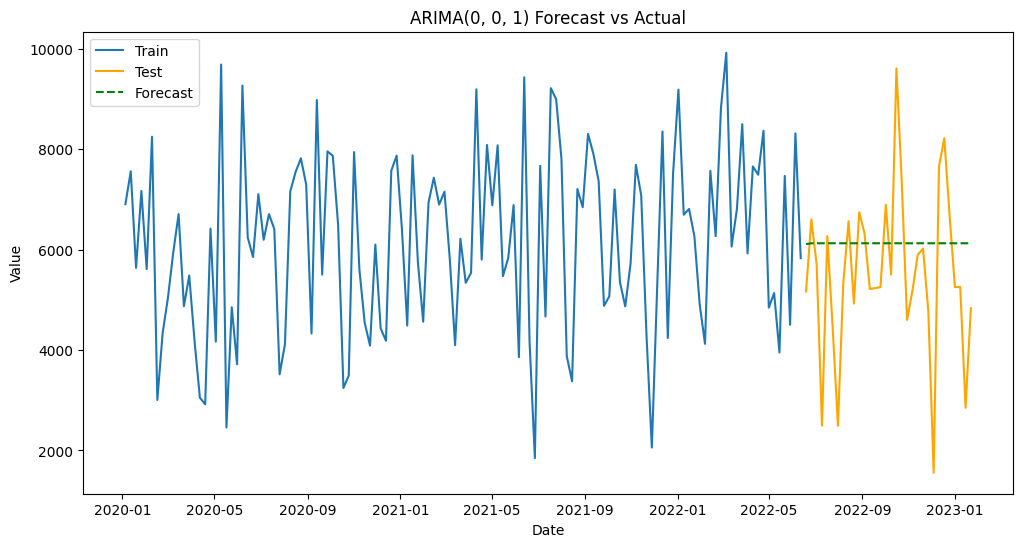

Forecast Performance for (0, 0, 1):
MAE   : 1317.34
RMSE  : 1741.64
MAPE  : 36.14%
SMAPE : 25.10%


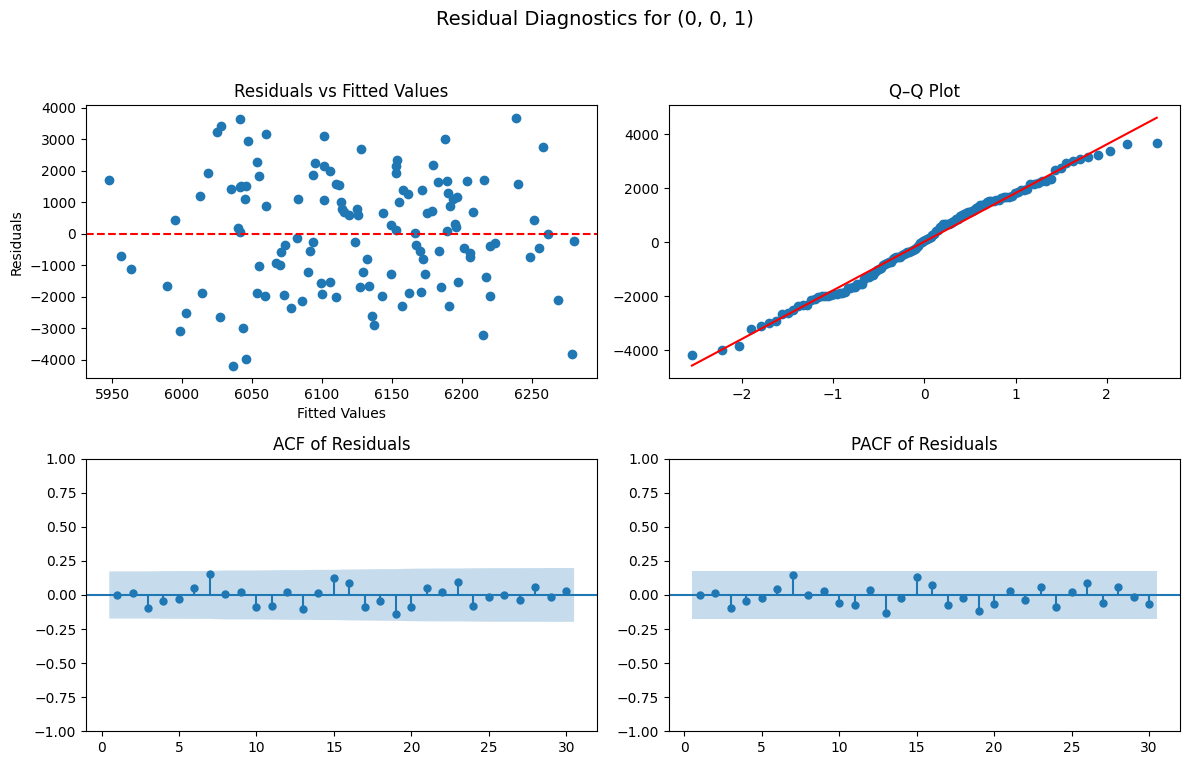

Ljung-Box test for (0, 0, 1) (lag=30):
      lb_stat  lb_pvalue
30  22.177778   0.847499


In [6]:
# Final ARIMA model
order_arima = (0, 0, 1)

# Train and forecast ARIMA
model_arima, forecast_arima, _, _ = train_and_forecast_arima(train_series, test_data=test_series, order=order_arima)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_arima, order_arima)
forecast_performance(test_series, forecast_arima, order_arima)

# Residual diagnostics
residual_diagnostics(model_arima, order_arima)

## SARIMA

In [10]:
# Deinfe pdq
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Define PDQM
seasonal_param_grid = {
    'P': [0, 1], 
    'D': [0, 1], 
    'Q': [0, 1], 
    'm': [7, 13, 25]
}

# Grid search for SARIMA
best_params = grid_search_arima_cv(
    train_series, 
    param_grid=param_grid, 
    seasonal_param_grid=seasonal_param_grid, 
    n_splits=4
)
print(best_params.head(10))

         order seasonal_order      avg_aic      avg_bic   avg_mape
27   (0, 0, 1)   (0, 0, 1, 7)  1173.716202  1182.010137  27.431398
351  (2, 0, 2)   (1, 0, 1, 7)  1177.302927  1193.890795  27.433527
49   (0, 0, 2)  (0, 0, 0, 13)  1174.578943  1182.872877  27.437551
48   (0, 0, 2)   (0, 0, 0, 7)  1174.578943  1182.872877  27.437551
50   (0, 0, 2)  (0, 0, 0, 25)  1174.578943  1182.872877  27.437551
195  (1, 0, 2)   (0, 0, 1, 7)  1176.720899  1189.161800  27.456937
62   (0, 0, 2)  (1, 0, 0, 25)  1179.497024  1189.864442  27.462997
51   (0, 0, 2)   (0, 0, 1, 7)  1175.395249  1185.762666  27.488493
26   (0, 0, 1)  (0, 0, 0, 25)  1172.657140  1178.877591  27.493294
24   (0, 0, 1)   (0, 0, 0, 7)  1172.657140  1178.877591  27.493294


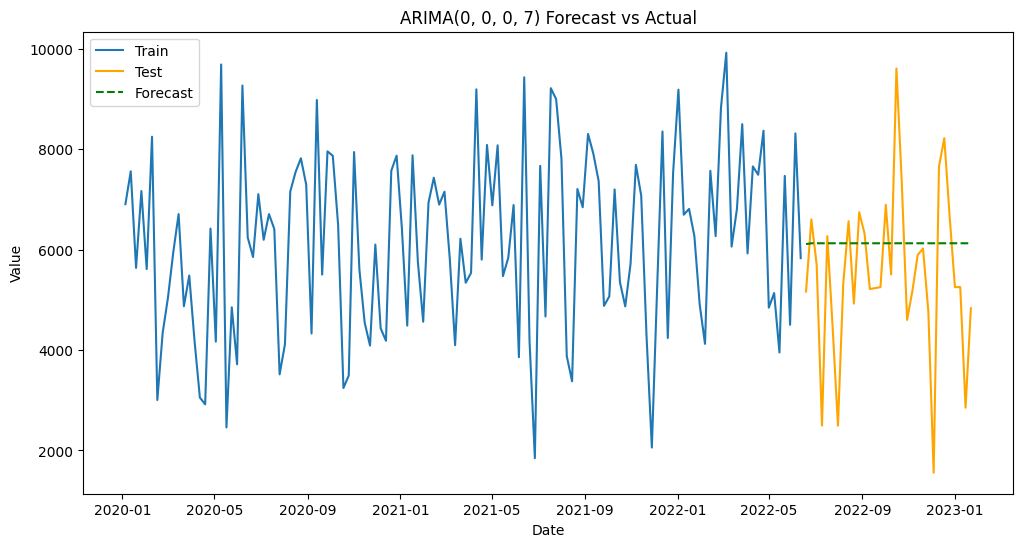

Forecast Performance for (0, 0, 0, 7):
MAE   : 1317.34
RMSE  : 1741.64
MAPE  : 36.14%
SMAPE : 25.10%


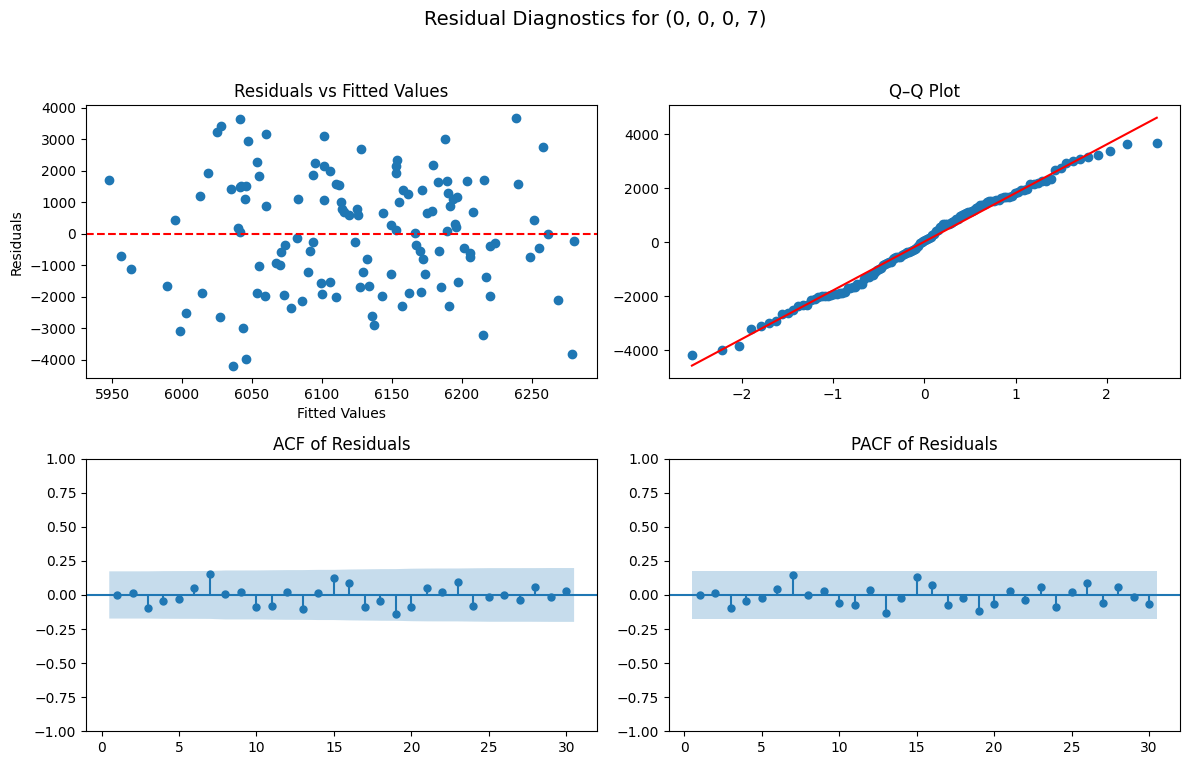

Ljung-Box test for (0, 0, 0, 7) (lag=30):
      lb_stat  lb_pvalue
30  22.177778   0.847499


In [14]:
# Final SARIMA model
order_sarima = (0, 0, 1)
seasonal_order_sarima = (0, 0, 0, 7)

# Train and forecast SARIMA
model_sarima, forecast_sarima, _, _ = train_and_forecast_arima(
    train_series, 
    test_data=test_series, 
    order=order_sarima, 
    seasonal_order=seasonal_order_sarima,
)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_sarima, seasonal_order_sarima)
forecast_performance(test_series, forecast_arima, seasonal_order_sarima)

# Residual diagnostics
residual_diagnostics(model_arima, seasonal_order_sarima)

# Multivariate

## ARIMAX

In [8]:
# Deinfe pdq
param_grid = {
    'p': [0, 1, 2],
    'd': [0, 1],
    'q': [0, 1, 2]
}

# Grid search for ARIMAX
best_params = grid_search_arima_cv(train_series, param_grid=param_grid, n_splits=4, exog=train_exog)
print(best_params)

        order seasonal_order      avg_aic      avg_bic   avg_mape
12  (2, 0, 0)           None  1101.182822  1113.623723  11.430129
0   (0, 0, 0)           None  1099.194476  1107.488411  11.438312
7   (1, 0, 1)           None  1101.330967  1113.771869  11.452601
1   (0, 0, 1)           None  1099.344160  1109.711578  11.457830
6   (1, 0, 0)           None  1099.456229  1109.823647  11.470606
2   (0, 0, 2)           None  1101.854265  1114.295167  11.483522
13  (2, 0, 1)           None  1102.849467  1117.363852  11.736587
15  (2, 1, 0)           None  1101.538926  1113.862714  11.749170
8   (1, 0, 2)           None  1103.484573  1117.998958  11.986563
14  (2, 0, 2)           None  1103.901090  1120.488958  12.122977
4   (0, 1, 1)           None  1087.728849  1097.998673  12.783350
16  (2, 1, 1)           None  1090.388175  1104.765928  13.282982
10  (1, 1, 1)           None  1088.148980  1100.472768  13.576446
5   (0, 1, 2)           None  1087.933094  1100.256883  13.603864
11  (1, 1,

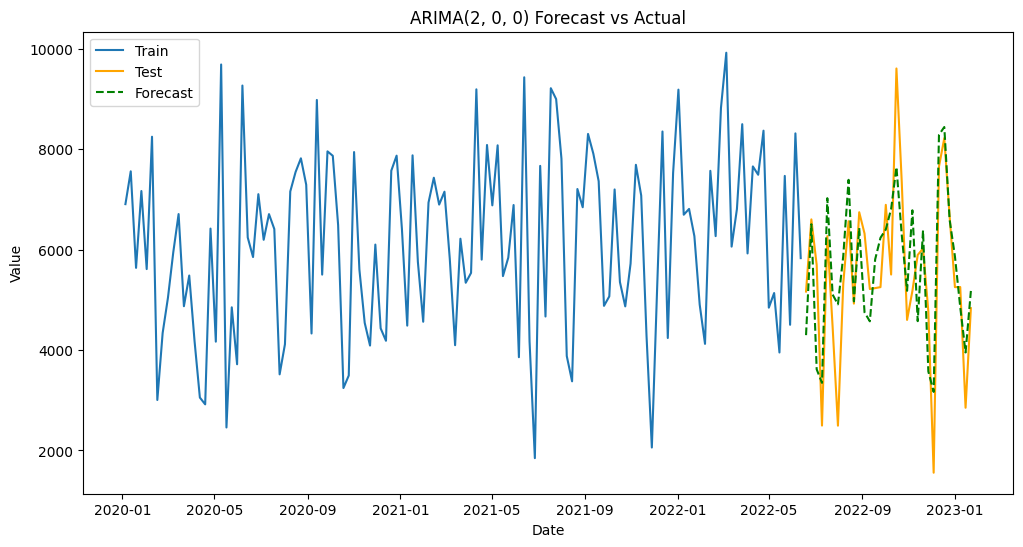

Forecast Performance for (2, 0, 0):
MAE   : 877.36
RMSE  : 1059.32
MAPE  : 20.34%
SMAPE : 18.23%


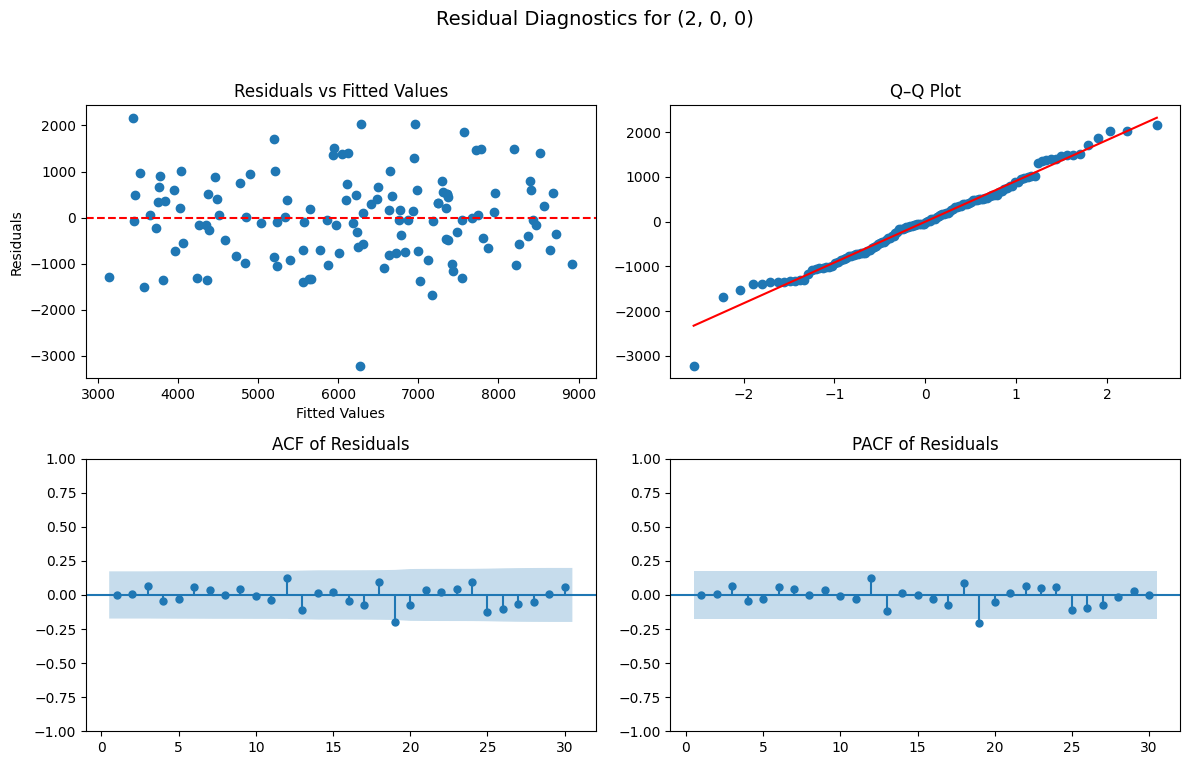

Ljung-Box test for (2, 0, 0) (lag=30):
      lb_stat  lb_pvalue
30  23.893826   0.776807


In [9]:
# Final ARIMAX model
order_arimax = (2, 0, 0)

# Train and forecast ARIMAX
model_arimax, forecast_arimax, _, _ = train_and_forecast_arima(
    train_series, 
    test_series, 
    order_arimax,
    exog_train=train_exog,
    exog_test=test_exog
)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_arimax, order_arimax)
forecast_performance(test_series, forecast_arimax, order_arimax)

# Residual diagnostics
residual_diagnostics(model_arimax, order_arimax)

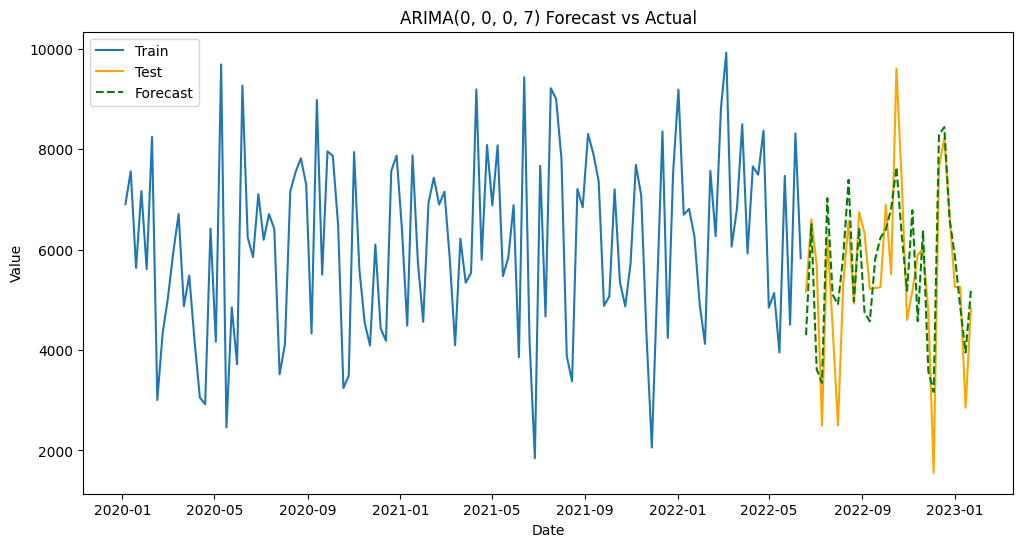

Forecast Performance for (0, 0, 0, 7):
MAE   : 877.36
RMSE  : 1059.32
MAPE  : 20.34%
SMAPE : 18.23%


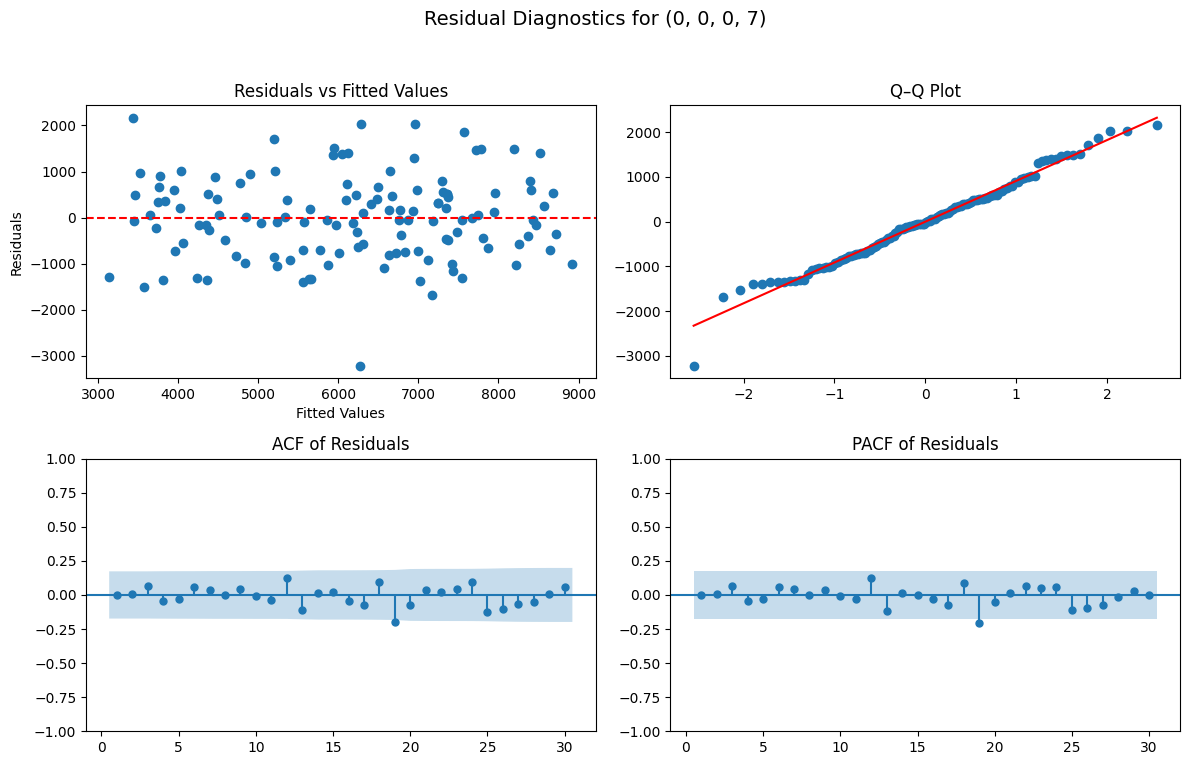

Ljung-Box test for (0, 0, 0, 7) (lag=30):
      lb_stat  lb_pvalue
30  23.893826   0.776807


In [10]:
# Final SARIMAX model
order_srimax = (2, 0, 0)
seasonal_order_sarimax = (0, 0, 0, 7)

# Train and forecast SARIMAX
model_sarimax, forecast_sarimax, _, _ = train_and_forecast_arima(
    train_series, 
    test_series, 
    order_arimax,
    seasonal_order=seasonal_order_sarimax,
    exog_test=test_exog,
    exog_train=train_exog
)

# Evaluate forecast
plot_forecast_vs_actual(train_series, test_series, forecast_sarimax, seasonal_order_sarimax)
forecast_performance(test_series, forecast_sarimax, seasonal_order_sarimax)

# Residual diagnostics
residual_diagnostics(model_sarimax, seasonal_order_sarimax)